In [1]:
import pandas as pd


In [2]:

file_path = 'DataCoSupplyChainDataset.csv'

# Lisez le fichier CSV avec pandas
data = pd.read_csv(file_path, encoding='ISO-8859-1')

C:\Users\Dell\IdeaProjects\machine learning\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Corrélations avec la colonne 'Order Item Quantity' après transformation:
Order Item Quantity              1.000000
Sales                            0.140432
Sales per customer               0.139265
Order Item Total                 0.139265
Benefit per order                0.099642
Order Profit Per Order           0.099642
Order Item Discount              0.078499
Order Zipcode                    0.001035
Order Item Profit Ratio         -0.000008
Late_delivery_risk              -0.000229
Order Item Discount Rate        -0.000233
Longitude                       -0.000313
Latitude                        -0.001682
Days for shipping (real)        -0.002037
Days for shipment (scheduled)   -0.003498
Customer Zipcode                -0.005526
Customer Id                     -0.074164
Order Customer Id               -0.074164
Order Item Id                   -0.074851
Order Id                        -0.077212
Department Id                   -0.270543
Product Category Id             -0.307988
Cat

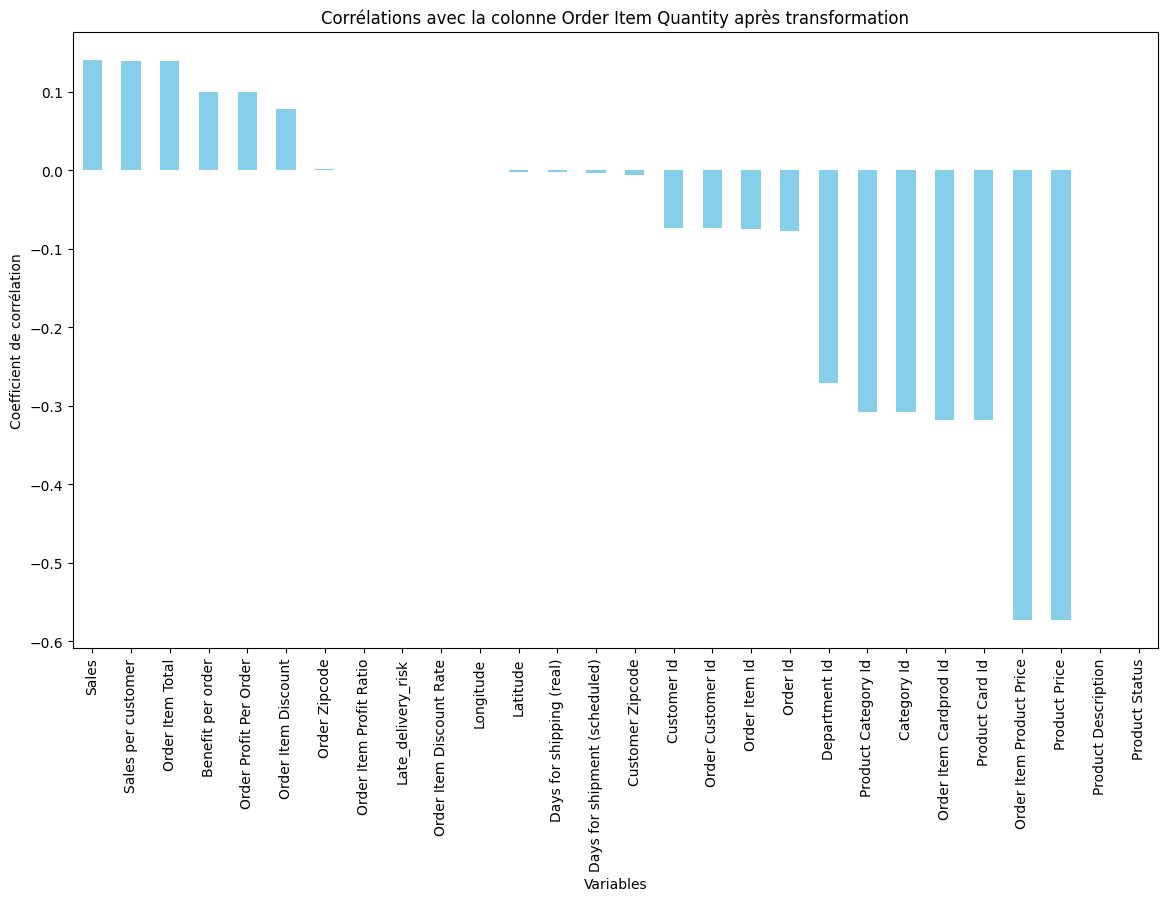

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Vérification des types de données
data.dtypes

# Sélection des colonnes numériques
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Appliquer la racine carrée aux colonnes numériques
data[numeric_columns] = data[numeric_columns].apply(lambda x: np.sqrt(x) if np.issubdtype(x.dtype, np.number) else x)

# Calcul des corrélations avec la colonne "Order Item Quantity" pour les colonnes numériques
correlations_with_quantity = (data[numeric_columns]
                              .corr()['Order Item Quantity']
                              .sort_values(ascending=False))

# Affichage des corrélations
print("Corrélations avec la colonne 'Order Item Quantity' après transformation:")
print(correlations_with_quantity)

# Visualisation des corrélations avec un barplot
plt.figure(figsize=(14, 8))
correlations_with_quantity.drop('Order Item Quantity').plot(kind='bar', color='skyblue')
plt.title('Corrélations avec la colonne Order Item Quantity après transformation')
plt.xlabel('Variables')
plt.ylabel('Coefficient de corrélation')
plt.show()


In [4]:
from sklearn.preprocessing import LabelEncoder

# Sélection des colonnes de type object
object_columns = data.select_dtypes(include=['object']).columns

# Stockage des colonnes qui étaient de type object avant l'encodage
categorical_columns_before = data[object_columns]

# Encodage des colonnes de type object avec LabelEncoder
label_encoder = LabelEncoder()
for column in object_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Affichage des colonnes qui étaient de type object avant l'encodage
print("Colonnes de type object avant l'encodage :")
print(categorical_columns_before.head())

# Affichage des colonnes devenues catégoriques après l'encodage
print("\nColonnes devenues catégoriques après l'encodage :")
data[object_columns].head()


Colonnes de type object avant l'encodage :
       Type   Delivery Status   Category Name Customer City Customer Country  \
0     DEBIT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   
1  TRANSFER     Late delivery  Sporting Goods        Caguas      Puerto Rico   
2      CASH  Shipping on time  Sporting Goods      San Jose          EE. UU.   
3     DEBIT  Advance shipping  Sporting Goods   Los Angeles          EE. UU.   
4   PAYMENT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   

  Customer Email Customer Fname Customer Lname Customer Password  \
0      XXXXXXXXX          Cally       Holloway         XXXXXXXXX   
1      XXXXXXXXX          Irene           Luna         XXXXXXXXX   
2      XXXXXXXXX        Gillian      Maldonado         XXXXXXXXX   
3      XXXXXXXXX           Tana           Tate         XXXXXXXXX   
4      XXXXXXXXX           Orli      Hendricks         XXXXXXXXX   

  Customer Segment  ...  Order City Order Country order date (DateO

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,1,0,40,66,1,0,109,482,0,0,...,331,70,5961,15,475,2,78,78,27149,3
1,3,1,40,66,1,0,311,615,0,0,...,391,69,1147,13,841,5,78,78,2209,3
2,0,3,40,452,0,0,249,626,0,0,...,391,69,1146,13,841,1,78,78,1980,3
3,1,0,40,285,0,0,707,989,0,2,...,3226,8,1145,11,835,2,78,78,1752,3
4,2,0,40,66,1,0,570,454,0,1,...,3226,8,1144,11,835,6,78,78,1528,3


In [5]:
from scipy.stats import pointbiserialr
import numpy as np

# Appliquer une transformation logarithmique à 'Sales'
data['Order Item Quantity'] = np.log1p(data['Order Item Quantity'])

# Calcul de la corrélation entre chaque variable encodée et 'Sales'
correlations = {}
for column in object_columns:
    correlation, _ = pointbiserialr(data[column], data['Order Item Quantity'])
    correlations[column] = correlation

# Affichage des corrélations
print("Corrélations avec 'Order Item Quantity' après transformation logarithmique:")
for column, correlation in correlations.items():
    print(f"{column}: {correlation}")


Corrélations avec 'Order Item Quantity' après transformation logarithmique:
Type: 0.0030135079473472375
Delivery Status: -0.0025587274111188484
Category Name: -0.03309270829182458
Customer City: -0.0007817792032388362
Customer Country: 0.0023132596017530578
Customer Email: nan
Customer Fname: 0.00843712560151774
Customer Lname: 0.019726097213207845
Customer Password: nan
Customer Segment: -0.0030235244481130923
Customer State: 0.006791258405094088
Customer Street: -0.0018944245346034733
Department Name: 0.23531217898550805
Market: -0.0022782130608912793
Order City: 0.0028060509387141932
Order Country: 0.015921899442861792
order date (DateOrders): 0.031112639790294938
Order Region: -0.016762894296011542
Order State: -0.0024407640536881375
Order Status: 0.0013177117842839976
Product Image: 0.370823740718755
Product Name: 0.370823740718755
shipping date (DateOrders): 0.032272598554380964
Shipping Mode: -0.002164441408096115


C:\Users\Dell\IdeaProjects\machine learning\venv\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [6]:
import pandas as pd

# Supprimer les colonnes qui ont la même valeur absolue de corrélation
seuil_correlation = 0.1

# Calculer la matrice de corrélation
correlations = data.corr()

# Filtrer les colonnes numériques avec une corrélation supérieure au seuil
numeric_columns_to_keep = correlations['Order Item Quantity'][abs(correlations['Order Item Quantity']) > seuil_correlation].index.tolist()

# Filtrer les colonnes catégoriques avec une corrélation supérieure au seuil
categorical_columns_to_keep = [column for column, correlation in correlations['Order Item Quantity'].items() if abs(correlation) > seuil_correlation and column not in numeric_columns_to_keep]

# Concaténer les colonnes à garder
columns_to_keep = numeric_columns_to_keep + categorical_columns_to_keep

# Créer un nouveau DataFrame avec les colonnes à garder
data_filtered = data[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame
print("\nNouveau DataFrame avec les colonnes à garder :")
print(data_filtered.head())



Nouveau DataFrame avec les colonnes à garder :
   Sales per customer  Category Id  Department Id  Department Name  \
0           17.738095     8.544004       1.414214                4   
1           17.645396     8.544004       1.414214                4   
2           17.598864     8.544004       1.414214                4   
3           17.458809     8.544004       1.414214                4   
4           17.269916     8.544004       1.414214                4   

   Order Item Cardprod Id  Order Item Product Price  Order Item Quantity  \
0               36.878178                 18.103867             0.693147   
1               36.878178                 18.103867             0.693147   
2               36.878178                 18.103867             0.693147   
3               36.878178                 18.103867             0.693147   
4               36.878178                 18.103867             0.693147   

       Sales  Order Item Total  Product Card Id  Product Category Id  \
0 

In [7]:
data_filtered_no_missing = data_filtered.dropna()
print("\nNouveau DataFrame sans les valeurs manquantes :")
data_filtered_no_missing.head()



Nouveau DataFrame sans les valeurs manquantes :


,Sales per customer,Category Id,Department Id,Department Name,Order Item Cardprod Id,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Product Card Id,Product Category Id,Product Image,Product Name,Product Price
0,17.738095,8.544004,1.414214,4,36.878178,18.103867,0.693147,18.103867,17.738095,36.878178,8.544004,78,78,18.103867
1,17.645396,8.544004,1.414214,4,36.878178,18.103867,0.693147,18.103867,17.645396,36.878178,8.544004,78,78,18.103867
2,17.598864,8.544004,1.414214,4,36.878178,18.103867,0.693147,18.103867,17.598864,36.878178,8.544004,78,78,18.103867
3,17.458809,8.544004,1.414214,4,36.878178,18.103867,0.693147,18.103867,17.458809,36.878178,8.544004,78,78,18.103867
4,17.269916,8.544004,1.414214,4,36.878178,18.103867,0.693147,18.103867,17.269916,36.878178,8.544004,78,78,18.103867


In [8]:
import pandas as pd

# Afficher le nombre de valeurs manquantes par colonne
missing_values_count = data_filtered.isnull().sum()

# Afficher le résultat
print("Nombre de valeurs manquantes par colonne :")
print(missing_values_count)

# Supprimer les lignes contenant des valeurs manquantes
data_filtered_no_missing = data_filtered.dropna()

# Afficher le nouveau DataFrame sans les valeurs manquantes
print("\nNouveau DataFrame sans les valeurs manquantes :")
print(data_filtered_no_missing.head())


Nombre de valeurs manquantes par colonne :
Sales per customer          0
Category Id                 0
Department Id               0
Department Name             0
Order Item Cardprod Id      0
Order Item Product Price    0
Order Item Quantity         0
Sales                       0
Order Item Total            0
Product Card Id             0
Product Category Id         0
Product Image               0
Product Name                0
Product Price               0
dtype: int64

Nouveau DataFrame sans les valeurs manquantes :
   Sales per customer  Category Id  Department Id  Department Name  \
0           17.738095     8.544004       1.414214                4   
1           17.645396     8.544004       1.414214                4   
2           17.598864     8.544004       1.414214                4   
3           17.458809     8.544004       1.414214                4   
4           17.269916     8.544004       1.414214                4   

   Order Item Cardprod Id  Order Item Product Price  O

In [9]:
# Supprimer les lignes avec des valeurs dupliquées
data_no_duplicates = data_filtered_no_missing.drop_duplicates()

# Afficher les premières lignes du DataFrame sans les valeurs dupliquées
print("\nNouveau DataFrame sans les valeurs dupliquées :")
print(data_no_duplicates.head())

# Afficher le nombre de lignes supprimées en raison des duplicatas
removed_duplicates_count = len(data_filtered_no_missing) - len(data_no_duplicates)
print("\nNombre de lignes supprimées en raison des duplicatas :", removed_duplicates_count)



Nouveau DataFrame sans les valeurs dupliquées :
   Sales per customer  Category Id  Department Id  Department Name  \
0           17.738095     8.544004       1.414214                4   
1           17.645396     8.544004       1.414214                4   
2           17.598864     8.544004       1.414214                4   
3           17.458809     8.544004       1.414214                4   
4           17.269916     8.544004       1.414214                4   

   Order Item Cardprod Id  Order Item Product Price  Order Item Quantity  \
0               36.878178                 18.103867             0.693147   
1               36.878178                 18.103867             0.693147   
2               36.878178                 18.103867             0.693147   
3               36.878178                 18.103867             0.693147   
4               36.878178                 18.103867             0.693147   

       Sales  Order Item Total  Product Card Id  Product Category Id  \
0

In [10]:
# Afficher le nombre total de lignes restantes dans le DataFrame
total_rows_remaining = data_no_duplicates.shape[0]
print("\nNombre total de lignes restantes dans le DataFrame :", total_rows_remaining)



Nombre total de lignes restantes dans le DataFrame : 6125


In [11]:

# Calculer la corrélation entre Order Item Cardprod Id et Product Card Id
correlation_cardprod_id = data_no_duplicates['Order Item Cardprod Id'].corr(data_no_duplicates['Product Card Id'])
print(f"Corrélation entre Order Item Cardprod Id et Product Card Id : {correlation_cardprod_id}")

# Calculer la corrélation entre Order Item Product Price et Sales
correlation_product_price_sales = data_no_duplicates['Order Item Product Price'].corr(data_no_duplicates['Sales'])
print(f"Corrélation entre Order Item Product Price et Sales : {correlation_product_price_sales}")

# Calculer la corrélation entre Order Item Product Price et Product Price
correlation_product_price = data_no_duplicates['Order Item Product Price'].corr(data_no_duplicates['Product Price'])
print(f"Corrélation entre Order Item Product Price et Product Price : {correlation_product_price}")

# Calculer la corrélation entre Order Item Total et Sales per customer
correlation_order_total_sales_per_customer = data_no_duplicates['Order Item Total'].corr(data_no_duplicates['Sales per customer'])
print(f"Corrélation entre Order Item Total et Sales per customer : {correlation_order_total_sales_per_customer}")
# Calculer la corrélation entre Order Item Total et Sales per customer
correlation_Product_Category_Category_Id = data_no_duplicates['Product Category Id'].corr(data_no_duplicates['Category Id'])
print(f"Corrélation entre Product Category Id et  Category Id : {correlation_Product_Category_Category_Id}")


Corrélation entre Order Item Cardprod Id et Product Card Id : 0.9999999999999999
Corrélation entre Order Item Product Price et Sales : 0.7769879600735159
Corrélation entre Order Item Product Price et Product Price : 0.9999999999999998
Corrélation entre Order Item Total et Sales per customer : 1.0
Corrélation entre Product Category Id et  Category Id : 1.0


In [12]:
data_no_duplicates = data_no_duplicates.drop(["Order Item Cardprod Id","Order Item Product Price", "Sales per customer","Category Id"], axis=1)


In [13]:
import os
import openpyxl  # Ajoutez cette ligne pour importer le module openpyxl

# Vérifier si le fichier existe déjà
if not os.path.isfile('data_no_duplicates1.xlsx'):
    # Sauvegarder le DataFrame sans les duplicatas dans un fichier Excel
    data_no_duplicates.to_excel('data_no_duplicates1.xlsx', index=False)
    print("Le fichier 'data_no_duplicates1.xlsx' a été enregistré.")
else:
    print("Le fichier 'data_no_duplicates1.xlsx' existe déjà. Aucune nouvelle sauvegarde nécessaire.")


Le fichier 'data_no_duplicates1.xlsx' existe déjà. Aucune nouvelle sauvegarde nécessaire.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assurez-vous d'avoir une colonne cible 'Order Item Quantity' dans votre dataset
X = data_no_duplicates.drop('Order Item Quantity', axis=1)
y = data_no_duplicates['Order Item Quantity']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
random_forest_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = random_forest_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test : {mse}")

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination (R²) : {r2}")

# Calculer l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erreur absolue moyenne (MAE) : {mae}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test : 1.5193047076429649e-07
Coefficient de détermination (R²) : 0.999995649932307
Erreur absolue moyenne (MAE) : 3.6839889045701076e-05


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
import pandas as pd  # Assurez-vous que cette importation est également incluse si elle est utilisée dans le reste de votre code

# Assurez-vous d'avoir une colonne cible 'Sales' dans votre dataset
X = data_no_duplicates.drop('Order Item Quantity', axis=1)
y = data_no_duplicates['Order Item Quantity']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression linéaire
linear_model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
linear_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = linear_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test : {mse}")

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination (R²) : {r2}")

# Calculer l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erreur absolue moyenne (MAE) : {mae}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test : 0.004762066722581661
Coefficient de détermination (R²) : 0.8636526794298389
Erreur absolue moyenne (MAE) : 0.054277343106201255


In [16]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Assurez-vous d'avoir une colonne cible 'Sales' dans votre dataset
X = data_no_duplicates.drop('Order Item Quantity', axis=1)
y = data_no_duplicates['Order Item Quantity']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle SVM pour la régression
svm_model = SVR(kernel='rbf')  # Vous pouvez choisir le noyau approprié pour votre problème

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")
print(f"Erreur absolue moyenne (MAE) : {mae}")




Erreur quadratique moyenne (MSE) sur l'ensemble de test : 0.004207844442937957
Coefficient de détermination (R²) : 0.8795211515096963
Erreur absolue moyenne (MAE) : 0.05527993128489549


In [17]:
from sklearn.linear_model import Ridge

# Initialiser le modèle de régression Ridge
ridge_model = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha selon vos besoins

# Entraîner le modèle sur l'ensemble d'entraînement
ridge_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_ridge = ridge_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle de régression Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (Régression Ridge) : {mse_ridge}")
print(f"Coefficient de détermination (R²) pour le modèle de régression Ridge : {r2_ridge}")
print(f"Erreur absolue moyenne (MAE) pour le modèle de régression Ridge : {mae_ridge}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (Régression Ridge) : 0.004756377881014595
Coefficient de détermination (R²) pour le modèle de régression Ridge : 0.8638155621339261
Erreur absolue moyenne (MAE) pour le modèle de régression Ridge : 0.0544121943319041


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialiser le modèle de Gradient Boosting pour la régression
gb_model = GradientBoostingRegressor(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
gb_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle de Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (Gradient Boosting) : {mse_gb}")
print(f"Coefficient de détermination (R²) pour le modèle de Gradient Boosting : {r2_gb}")
print(f"Erreur absolue moyenne (MAE) pour le modèle de Gradient Boosting : {mae_gb}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (Gradient Boosting) : 0.00012802353278618448
Coefficient de détermination (R²) pour le modèle de Gradient Boosting : 0.9963344348825379
Erreur absolue moyenne (MAE) pour le modèle de Gradient Boosting : 0.008211762921766319


In [19]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialiser le modèle de régression bayésienne
bayesian_model = BayesianRidge()

# Entraîner le modèle sur l'ensemble d'entraînement
bayesian_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_bayesian = bayesian_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle de régression bayésienne
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (Régression bayésienne) : {mse_bayesian}")
print(f"Coefficient de détermination (R²) pour le modèle de régression bayésienne : {r2_bayesian}")
print(f"Erreur absolue moyenne (MAE) pour le modèle de régression bayésienne : {mae_bayesian}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (Régression bayésienne) : 0.0047566897433149735
Coefficient de détermination (R²) pour le modèle de régression bayésienne : 0.8638066329039256
Erreur absolue moyenne (MAE) pour le modèle de régression bayésienne : 0.05442038508565911


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialiser le modèle k-NN pour la régression (choisissez le nombre de voisins approprié avec n_neighbors)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Entraîner le modèle sur l'ensemble d'entraînement
knn_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle k-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (k-NN) : {mse_knn}")
print(f"Coefficient de détermination (R²) pour le modèle k-NN : {r2_knn}")
print(f"Erreur absolue moyenne (MAE) pour le modèle k-NN : {mae_knn}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (k-NN) : 5.531600013582545e-06
Coefficient de détermination (R²) pour le modèle k-NN : 0.9998416194303323
Erreur absolue moyenne (MAE) pour le modèle k-NN : 0.00021314403610593778


In [21]:
# Dictionnaire pour stocker les résultats des métriques
metrics = {}

# Entraîner et évaluer chaque modèle
for model, name in zip([random_forest_model, bayesian_model, knn_model, gb_model, ridge_model, linear_model, svm_model],
                       ['RandomForest', 'BayesianRidge', 'k-NN', 'GradientBoosting', 'Ridge', 'LinearRegression', 'SVM']):
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Stocker les métriques dans le dictionnaire
    metrics[name] = [mse, r2, mae]

# Créer un DataFrame à partir du dictionnaire
df_metrics = pd.DataFrame(metrics, index=['MSE', 'R²', 'MAE'])

# Afficher le tableau de comparaison
df_metrics

,RandomForest,BayesianRidge,k-NN,GradientBoosting,Ridge,LinearRegression,SVM
MSE,1.519305e-07,0.004757,0.000006,0.000128,0.004756,0.004762,0.004208
R²,9.999956e-01,0.863807,0.999842,0.996334,0.863816,0.863653,0.879521
MAE,3.683989e-05,0.054420,0.000213,0.008212,0.054412,0.054277,0.055280


In [22]:
import numpy as np
# Calculer la note moyenne pondérée pour chaque modèle
model_scores = []
for name, values in metrics.items():
    weighted_score = np.average(values, weights=[0.25, 0.5, 0.25])
    model_scores.append([name, weighted_score])

# Créer un DataFrame pour stocker les notes
df_scores = pd.DataFrame(model_scores, columns=['Model', 'Score'])

# Classer les modèles selon leur note
df_scores = df_scores.sort_values(by='Score', ascending=False)

# Afficher le tableau de classement
df_scores

,Model,Score
3,GradientBoosting,0.500252
0,RandomForest,0.500007
2,k-NN,0.499975
6,SVM,0.454633
4,Ridge,0.446700
1,BayesianRidge,0.446698
5,LinearRegression,0.446586


In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import openpyxl
import os

# Charger les données d'entraînement depuis un fichier Excel
data_train = pd.read_excel('data_no_duplicates1.xlsx')

# Diviser le dataset d'entraînement
X_train = data_train.drop('Order Item Quantity', axis=1)
y_train = data_train['Order Item Quantity']

# Initialiser le modèle Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
random_forest_model.fit(X_train, y_train)

# Générer un nouveau nom de fichier Excel avec les mêmes colonnes que data_no_duplicates.xlsx (sauf 'Sales')
counter = 1
while True:
    excel_file_path = f'q.product-predicted_{counter}.xlsx'
    if not os.path.exists(excel_file_path):
        break
    counter += 1

wb = openpyxl.Workbook()
sheet = wb.active

# Écrire les en-têtes des colonnes dans le fichier Excel
for col_index, col_name in enumerate(X_train.columns):
    sheet.cell(row=1, column=col_index + 1, value=col_name)

# Laissez l'utilisateur entrer les données de test dans le fichier Excel (à l'exception de la colonne 'Order Item Quantity')
user_input_row = 2
for col_index, col_name in enumerate(X_train.columns):
    if col_name != 'Order Item Quantity':
        user_input = input(f"Entrez la valeur pour '{col_name}': ")

        # Vérifier que la valeur saisie peut être convertie en nombre
        try:
            user_input = float(user_input)
        except ValueError:
            print(f"Erreur: La valeur '{user_input}' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.")
            wb.close()
            exit()

        sheet.cell(row=user_input_row, column=col_index + 1, value=user_input)

# Sauvegarder le fichier Excel avec les données de test
wb.save(excel_file_path)

# Lire les données de test depuis le fichier Excel en sautant la première ligne
test_data_input = pd.read_excel(excel_file_path, header=None, skiprows=1, names=X_train.columns)

# Prédire les valeurs sur l'ensemble de test fourni par l'utilisateur
y_pred = random_forest_model.predict(test_data_input)

# Ajouter les prédictions au fichier Excel
sheet.cell(row=1, column=10, value='Order Item Quantity_Predicted')  # Colonne J (10e colonne en commençant par 1)
sheet.cell(row=user_input_row, column=10, value=y_pred[0])  # Colonne J

# Sauvegarder le fichier Excel avec les prédictions
wb.save(excel_file_path)

print(f"Les prédictions ont été ajoutées au fichier Excel '{excel_file_path}'.")


Les prédictions ont été ajoutées au fichier Excel 'q.product-predicted_2.xlsx'.
